In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/covid19-open-data/covid19-vaccination-access/facility-boundary-us-all.csv

--2023-02-12 05:44:54--  https://storage.googleapis.com/covid19-open-data/covid19-vaccination-access/facility-boundary-us-all.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 172.217.193.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 873611333 (833M) [application/octet-stream]
Saving to: ‘facility-boundary-us-all.csv.4’

facility-boundary-u 100%[===================>] 833.14M  89.5MB/s    in 10s     

2023-02-12 05:45:04 (82.2 MB/s) - ‘facility-boundary-us-all.csv.4’ saved [873611333/873611333]



In [3]:
df = pd.read_csv('facility-boundary-us-all.csv')
df.head()

,facility_place_id,facility_provider_id,facility_name,facility_latitude,facility_longitude,facility_country_region,facility_country_region_code,facility_sub_region_1,facility_sub_region_1_code,facility_sub_region_2,facility_sub_region_2_code,facility_region_place_id,mode_of_transportation,travel_time_threshold_minutes,facility_catchment_boundary
0,ChIJN4R5aXKDQYYRBi8GBgRqCpQ,6cda4268-a452-4df8-a5cf-06eab7738118,H-E-B Pharmacy,29.1990,-96.2695,United States,US,Texas,US-TX,Wharton County,48481,ChIJTzMUbKR1QYYRDR3dzLq5FyQ,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
1,ChIJRVT_Kv0muYkRJs4H2AMr82g,3db7d067-5bfe-4f8a-92a8-a442ddf4f3d6,Rite Aid,38.3348,-75.2125,United States,US,Maryland,US-MD,Worcester County,24047,ChIJX2ImBGsEuYkR32-GGFykvqo,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
2,ChIJN1yCw9Ls44cRISWIRWtdX4Q,52708038-17ff-4cde-ab81-2e8aaad97d32,Wester Drug,41.5958,-91.0125,United States,US,Iowa,US-IA,Muscatine County,19139,ChIJu9rUGNDw44cRGzo8MSTSxpE,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
3,ChIJCcRFacZU5okRIYHPFz4VP0M,e47abd97-4381-46e5-af70-658fd6e85a08,CVS Pharmacy,41.7989,-72.6960,United States,US,Connecticut,US-CT,Hartford County,9003,ChIJtxC3p6qs54kRIvK-2bctar0,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."
4,ChIJo1Gov7U4K4cR2Avr-F4X3Io,ffc2c956-04f6-4d88-a6af-22cab83957fc,Walmart Pharmacy,33.4590,-112.3380,United States,US,Arizona,US-AZ,Maricopa County,4013,ChIJ_6JyBQxdK4cRgEgsf9Ec7Eo,drive,15,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [..."


In [4]:
grouped = df.groupby('facility_sub_region_1_code')
res = grouped['facility_place_id'].nunique()
res = dict(res)
print(res)

{'US-AK': 65, 'US-AL': 1022, 'US-AR': 627, 'US-AZ': 1110, 'US-CA': 6144, 'US-CO': 708, 'US-CT': 710, 'US-DC': 118, 'US-DE': 195, 'US-FL': 4263, 'US-GA': 2084, 'US-HI': 157, 'US-IA': 642, 'US-ID': 321, 'US-IL': 1921, 'US-IN': 1209, 'US-KS': 520, 'US-KY': 894, 'US-LA': 1080, 'US-MA': 1090, 'US-MD': 1058, 'US-ME': 453, 'US-MI': 1892, 'US-MN': 671, 'US-MO': 981, 'US-MS': 448, 'US-MT': 164, 'US-NC': 1808, 'US-ND': 203, 'US-NE': 366, 'US-NH': 264, 'US-NJ': 1576, 'US-NM': 234, 'US-NV': 366, 'US-NY': 2880, 'US-OH': 2849, 'US-OK': 581, 'US-OR': 492, 'US-PA': 2703, 'US-PR': 197, 'US-RI': 156, 'US-SC': 983, 'US-SD': 145, 'US-TN': 1427, 'US-TX': 3755, 'US-UT': 460, 'US-VA': 1434, 'US-VI': 5, 'US-VT': 239, 'US-WA': 1152, 'US-WI': 1050, 'US-WV': 325, 'US-WY': 95}


In [26]:
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Virgin Islands': 'VI',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [6]:
!wget https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/NST-EST2022-ALLDATA.csv

--2023-02-12 05:45:38--  https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/NST-EST2022-ALLDATA.csv
Resolving www2.census.gov (www2.census.gov)... 23.1.10.164, 2600:1408:9000:883::208c, 2600:1408:9000:89b::208c
Connecting to www2.census.gov (www2.census.gov)|23.1.10.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23556 (23K) [text/csv]
Saving to: ‘NST-EST2022-ALLDATA.csv.2’

NST-EST2022-ALLDATA 100%[===================>]  23.00K  --.-KB/s    in 0.02s   

2023-02-12 05:45:38 (1.37 MB/s) - ‘NST-EST2022-ALLDATA.csv.2’ saved [23556/23556]



In [7]:
census_df = pd.read_csv('DECENNIALPL2020.P1-2023-02-12T022842.csv')
populations = dict(census_df.iloc[0])
del populations['Label (Grouping)']
print(populations)

{'Alabama': '5,024,279', 'Alaska': '733,391', 'Arizona': '7,151,502', 'Arkansas': '3,011,524', 'California': '39,538,223', 'Colorado': '5,773,714', 'Connecticut': '3,605,944', 'Delaware': '989,948', 'District of Columbia': '689,545', 'Florida': '21,538,187', 'Georgia': '10,711,908', 'Hawaii': '1,455,271', 'Idaho': '1,839,106', 'Illinois': '12,812,508', 'Indiana': '6,785,528', 'Iowa': '3,190,369', 'Kansas': '2,937,880', 'Kentucky': '4,505,836', 'Louisiana': '4,657,757', 'Maine': '1,362,359', 'Maryland': '6,177,224', 'Massachusetts': '7,029,917', 'Michigan': '10,077,331', 'Minnesota': '5,706,494', 'Mississippi': '2,961,279', 'Missouri': '6,154,913', 'Montana': '1,084,225', 'Nebraska': '1,961,504', 'Nevada': '3,104,614', 'New Hampshire': '1,377,529', 'New Jersey': '9,288,994', 'New Mexico': '2,117,522', 'New York': '20,201,249', 'North Carolina': '10,439,388', 'North Dakota': '779,094', 'Ohio': '11,799,448', 'Oklahoma': '3,959,353', 'Oregon': '4,237,256', 'Pennsylvania': '13,002,700', 'Rh

In [8]:
data = dict()
for state in populations:
    code = state_codes[state]
    data[code] = {
        'population': populations[state],
        'n_vaccinatin_facilities': res['US-'+code],
        'vaccination_facilities_per_10K_people': round(10000*res['US-'+code]/int(populations[state].replace(',', '')), 3)
    }

data = pd.DataFrame(data).transpose()
data.head()

,population,n_vaccinatin_facilities,vaccination_facilities_per_10K_people
AL,"5,024,279",1022,2.034
AK,"733,391",65,0.886
AZ,"7,151,502",1110,1.552
AR,"3,011,524",627,2.082
CA,"39,538,223",6144,1.554


In [25]:
data.to_csv('vaccination_access_aggregated.csv')

In [9]:
state_category = {
    "AL": "red",
    "AK": "red",
    "AZ": "purple",
    "AR": "red",
    "CA": "blue",
    "CO": "blue",
    "CT": "blue",
    "DE": "blue",
    "DC": "blue",
    "FL": "purple",
    "GA": "purple",
    "HI": "blue",
    "ID": "red",
    "IL": "blue",
    "IN": "red",
    "IA": "purple",
    "KS": "red",
    "KY": "red",
    "LA": "red",
    "ME": "blue",
    "MD": "blue",
    "MA": "blue",
    "MI": "blue",
    "MN": "blue",
    "MS": "red",
    "MO": "red",
    "MT": "red",
    "NE": "red",
    "NV": "blue",
    "NH": "blue",
    "NJ": "blue",
    "NM": "blue",
    "NY": "blue",
    "NC": "purple",
    "ND": "red",
    "OH": "purple",
    "OK": "red",
    "OR": "blue",
    "PA": "blue",
    "RI": "blue",
    "SC": "red",
    "SD": "red",
    "TN": "red",
    "TX": "red",
    "UT": "red",
    "VT": "blue",
    "VA": "blue",
    "WA": "blue",
    "WV": "red",
    "WI": "blue",
    "WY": "red"
}

In [17]:
y, colors = [], []
for state in data.index:
    if state not in state_category:
        continue
    y.append(data.loc[state].vaccination_facilities_per_10K_people)
    colors.append(state_category[state])

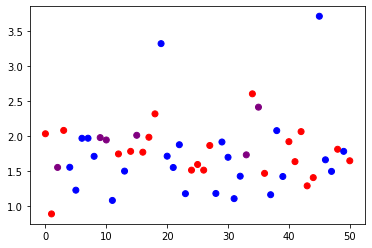

In [19]:
plt.scatter(np.arange(len(y)), y, c=colors)

In [10]:
demo = pd.read_csv('ACSDP1Y2021.DP05-2023-02-12T073042.csv')

cols = ['Label (Grouping)'] + [col for col in demo.columns if 'Estimate' in col]
demo = demo[cols]
demo = demo.rename(columns={col:col.split('!!')[0] for col in demo.columns})
demo = demo.iloc[[1, 4, 21, 24, 66, 67, 68, 69, 89]]
demo = demo.set_index('Label (Grouping)')
demo = demo.transpose()
demo.head()

Label (Grouping),Total population,Sex ratio (males per 100 females),18 years and over,65 years and over,White,Black or African American,American Indian and Alaska Native,Asian,Total housing units
Alabama,"5,039,877",94.3,"3,919,935","885,809","3,507,335","1,378,109","105,702","96,645","2,313,616"
Alaska,"732,673",109.6,"553,272","98,410","522,115","38,623","151,861","65,864","327,889"
Arizona,"7,276,316",99.5,"5,662,032","1,333,985","5,645,464","458,285","438,351","349,654","3,138,685"
Arkansas,"3,025,891",97.5,"2,322,098","525,153","2,405,726","489,012","83,619","67,428","1,380,768"
California,"39,237,836",100.0,"30,468,057","5,964,526","22,418,889","2,848,110","1,301,969","6,971,642","14,512,149"


In [11]:
inco = pd.read_csv('ACSDP5Y2021.DP03-2023-02-12T081424.csv')

cols = ['Label (Grouping)'] + [col for col in inco.columns if 'Estimate' in col]
inco = inco[cols]
inco = inco.rename(columns={col:col.split('!!')[0] for col in inco.columns})
inco = inco.iloc[[93, 102]]
inco = inco.set_index('Label (Grouping)')
inco = inco.transpose()
inco.head()

Label (Grouping),Per capita income (dollars),With health insurance coverage
Alabama,"30,458","4,442,707"
Alaska,"39,236","622,998"
Arizona,"34,644","6,233,168"
Arkansas,"29,210","2,698,745"
California,"41,276","36,146,100"


In [12]:
demo = pd.merge(demo, inco, left_index=True, right_index=True)
demo = demo.rename(columns={x:x.strip() for x in demo.columns})
demo.head()

Label (Grouping),Total population,Sex ratio (males per 100 females),18 years and over,65 years and over,White,Black or African American,American Indian and Alaska Native,Asian,Total housing units,Per capita income (dollars),With health insurance coverage
Alabama,"5,039,877",94.3,"3,919,935","885,809","3,507,335","1,378,109","105,702","96,645","2,313,616","30,458","4,442,707"
Alaska,"732,673",109.6,"553,272","98,410","522,115","38,623","151,861","65,864","327,889","39,236","622,998"
Arizona,"7,276,316",99.5,"5,662,032","1,333,985","5,645,464","458,285","438,351","349,654","3,138,685","34,644","6,233,168"
Arkansas,"3,025,891",97.5,"2,322,098","525,153","2,405,726","489,012","83,619","67,428","1,380,768","29,210","2,698,745"
California,"39,237,836",100.0,"30,468,057","5,964,526","22,418,889","2,848,110","1,301,969","6,971,642","14,512,149","41,276","36,146,100"


In [13]:
str2int = lambda x: int(x.replace(',', ''))

for col in demo.columns[2:]:
    demo[col] = round(demo[col].apply(str2int)/demo['Total population'].apply(str2int), 4)

demo['Total population'] = round(demo['Total population'].apply(str2int)/1e6, 4)
demo['Sex ratio (males per 100 females)'] = demo['Sex ratio (males per 100 females)'].astype(float)
demo.head()

Label (Grouping),Total population,Sex ratio (males per 100 females),18 years and over,65 years and over,White,Black or African American,American Indian and Alaska Native,Asian,Total housing units,Per capita income (dollars),With health insurance coverage
Alabama,5.0399,94.3,0.7778,0.1758,0.6959,0.2734,0.0210,0.0192,0.4591,0.0060,0.8815
Alaska,0.7327,109.6,0.7551,0.1343,0.7126,0.0527,0.2073,0.0899,0.4475,0.0536,0.8503
Arizona,7.2763,99.5,0.7781,0.1833,0.7759,0.0630,0.0602,0.0481,0.4314,0.0048,0.8566
Arkansas,3.0259,97.5,0.7674,0.1736,0.7950,0.1616,0.0276,0.0223,0.4563,0.0097,0.8919
California,39.2378,100.0,0.7765,0.1520,0.5714,0.0726,0.0332,0.1777,0.3699,0.0011,0.9212


In [14]:
demo.to_csv('demographics.csv')

In [15]:
vac_df = pd.read_csv('us_state_vaccinations.csv')
vac_df = vac_df.fillna(0)
vac_df = pd.DataFrame(vac_df.groupby('location').last().people_fully_vaccinated/1e6)
vac_df.head()

,people_fully_vaccinated
location,
Alabama,2.453426
Alaska,0.444763
American Samoa,0.038066
Arizona,4.352169
Arkansas,1.609584


In [16]:
demo = pd.merge(demo, vac_df, left_index=True, right_index=True, how='left')
demo.people_fully_vaccinated /= demo['Total population']

In [17]:
demo = demo.drop(columns=['Total housing units'])

In [21]:
from sklearn.ensemble import RandomForestRegressor
dat = demo.dropna().to_numpy()
X, y = dat[:, :-1], dat[:, -1]
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [105]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.2 MB/s eta 0:00:00


In [23]:
demo = demo.rename(columns={'18 years and over': 'Fraction of population >18yrs old'})

Exact explainer: 52it [00:10,  3.53s/it]


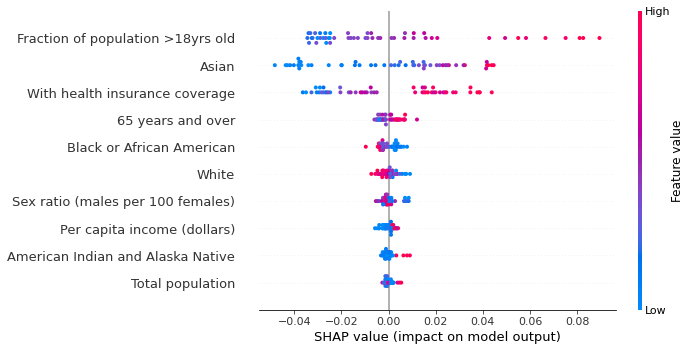

In [24]:
import shap

explainer = shap.Explainer(rf.predict, X, feature_names=demo.columns[:-1])
shap_values = explainer(X)

shap.plots.beeswarm(shap_values)

In [27]:
inv_state_map = {v:k for k,v in state_codes.items()}

processed_data = pd.read_csv("filtered_data.csv")
staff_shortage= processed_data.groupby("state",as_index=False).agg({"critical_staffing_shortage_today":"mean"}).sort_values(by="critical_staffing_shortage_today",ascending=False)
staff_shortage = staff_shortage[staff_shortage.state!='AS']
staff_shortage.state = staff_shortage.state.apply(lambda x: inv_state_map[x])
staff_shortage = staff_shortage.set_index('state')

demo = pd.merge(demo, staff_shortage, left_index=True, right_index=True, how='left')

In [31]:
dat = demo.dropna().to_numpy()
X, y = dat[:, :-1], dat[:, -1]
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

Permutation explainer: 52it [00:18,  1.36it/s]


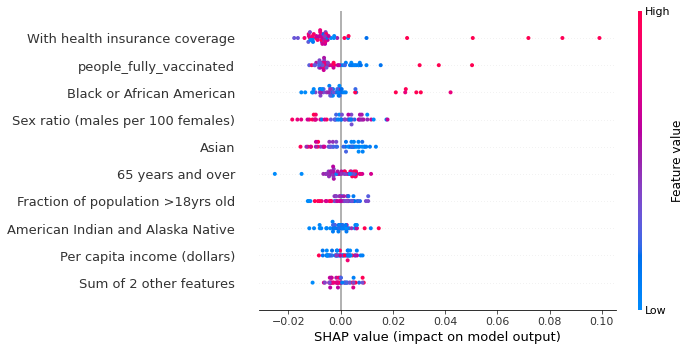

In [32]:
explainer = shap.Explainer(rf.predict, X, feature_names=demo.columns[:-1])
shap_values = explainer(X)

shap.plots.beeswarm(shap_values)